# **Pratham Sapra**
# Task 9 - Find the best Random Forest through Random Search
In order to **maximize the performance of the random forest**, we can perform a **random search** for better hyperparameters. This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation on the training data, and return the values (read best model with hyperparameters) that perform the best.

# **What is GridSearchCV?**

GridSearchCV operates as an exhaustive method which determines optimal model hyperparameters through systematic combinations testing. The method explores every combination present in a parameter grid while performing cross-validation tests on each combination. The identification process of best-performing hyperparameters remains guaranteed through this method though it leads to heavy computational expenses particularly within large datasets and complex models.

# **What is RandomizedSearchCV?**

The efficient hyperparameter tuning approach RandomizedSearchCV enables the selection of random hyperparameter combinations whereas it does not perform tests on every potential combination. This technique produces satisfactory results at a much lower computational cost point. Because RandomizedSearchCV avoids thorough combination exploration it fails to uncover the ultimate optimal hyperparameter configuration yet it presents an efficient method to find parameters with acceptable accuracy.

# **RandomizedSearchCV serves a purpose because GridSearchCV alone is not sufficient despite its existence.**

The extensive nature of GridSearchCV makes it impractical when models possess numerous hyperparameters because exhaustive testing demands tremendous combinations. RandomizedSearchCV proves useful because it enables extensive search through different hyperparameter combinations within reduced time intervals. The method proves to be beneficial for dealing with extensive datasets together with scenarios that need fast response times. The preferred choice for precise hyperparameter tuning is GridSearchCV when exhaustive search becomes feasible through available resources.



# **When to Use Which CV?**

These methods serve different application areas. The GridSearchCV methodology should be employed under sufficient computational resources to perform complete searches which lead to top performance. RandomizedSearchCV provides optimal results when handling extensive number of hyperparameters or prioritizing algorithm performance. RandomizedSearchCV is more suitable for demanding rapid yet dependable output while GridSearchCV delivers peak accuracy with sufficient processing capabilities.

# **Does a combination of RandomizedSearchCV and GridSearchCV present an option for use?**

The combination of these two methods proves to be an effective solution. RandomizedSearchCV serves as a first step to quickly examine many potential hyperparameters before selecting the best options which will become input for GridSearchCV. The identified reasonable parameter range allows GridSearchCV to execute specific parameter optimizations. Since these approaches complement each other they allow efficient discovery of optimal hyperparameters without generating unnecessary computational overload. Machine learning practitioners can achieve accurate model optimization by combining RandomizedSearchCV and GridSearchCV methods to find optimal results between model precision and performance.

### Task Requirements
- Build a RandomForest for the above dataset (not one but many with different sets of parameters)
- Explore RandomizedSearchCV in Scikit-learn documentation
- Create a parameter grid with these values
    - n_estimators : between 10 and 200
    - max_depth : choose between 3 and 20
    - max_features : ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1))
    - max_leaf_nodes : choose between 10 to 50
    - min_samples_split : choose between 2, 5, or 10
    - bootstrap : choose between True or False
- Create the estimator (RandomForestClassifier)
- Create the RandomizedSearchCV with estimator, parameter grid, scoring on roc auc, n_iter = 10, random_state=RSEED(50) for same reproducible results
- Fit the model
- Explore the best model parameters
- Use the best model parameters to predict
- Plot the best model ROC AUC Curve
- Plot the Confusion Matrix
- Write any insights or observations you found in the last

## Random Forest Theory revisited

### Random Forest = Decision Tree + Bagging + Random subsets of features

The Random Forest is a model made up of many `decision trees`. Rather than just simply averaging the prediction of trees (which we could call a **forest**), this model uses two key concepts that gives it the name random:
- Random sampling of training data points when building trees
- Random subsets of features considered when splitting nodes

To be more clear, this takes the idea of a single decision tree, and creates an _ensemble_ model out of hundreds or thousands of trees to reduce the variance.

Each tree is trained on a random set of the observations, and for each split of a node, only a `subset of the features` are used for making a split. When making predictions, the random forest `averages the predictions` for each of the individual decision trees for each data point in order to arrive at a final classification.

### Bagging

### Random sampling of training observations

- **Training**: each tree in a random forest learns from a **random sample** of the data points. The samples are drawn with replacement, known as **bootstrapping**, which means that some samples will be used multiple times in a single tree. The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest will have lower variance but not at the cost of increasing the bias.

- **Testing**: predictions are made by **averaging the predictions** of each decision tree. This procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions is known as **bagging**, short for **bootstrap aggregating**.

### Random Subsets of features for splitting nodes
Only a subset of all the features are considered for splitting each node in each decision tree. Generally this is set to `sqrt(n_features)` for classification meaning that if there are 16 features, at each node in each tree, only 4 random features will be considered for splitting the node.

### Let us see if our theory holds good in the same dataset we used for building Decision Tree

# Behavioral Risk Factor Surveillance System

[Behavioral Risk Factor Surveillance System](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system)

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population. Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

The following data set is from the Centers for Disease Control and Prevention (CDC) and includes socioeconomic and lifestyle indicators for hundreds of thousands of individuals. The objective is to predict the overall health of an individual: either 0 for poor health or 1 for good health. We'll limit the data to 100,000 individuals to speed up training.

Or, if you have the gut to take it, please pass the entire data and have fun!!!

This problem is imbalanced (far more of one label than another) so for assessing performance, we'll use recall, precision, receiver operating characteristic area under the curve (ROC AUC), and also plot the ROC curve. Accuracy is not a useful metric when dealing with an imbalanced problem. **Why????**

## Data Acquisition
Go to Kaggle Competition page and pull the dataset of 2015

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
RSEED=50

In [2]:
pip install kagglehub


In [3]:
import kagglehub
import pandas as pd

# Download the latest dataset from Kaggle
dataset_path = kagglehub.dataset_download("cdc/behavioral-risk-factor-surveillance-system")

# Define the CSV file path (modify as needed based on the actual dataset)
csv_file = f"{dataset_path}/2015.csv"  # Ensure this matches the actual file name

# Set a random seed for reproducibility
RSEED = 42

# Load dataset and take a sample
try:
    df = pd.read_csv(csv_file).sample(100000, random_state=RSEED)
    print(df.head())  # Display first few rows
except FileNotFoundError:
    print(f"Error: The file {csv_file} was not found. Check the dataset path.")
except ValueError:
    print("Error: The dataset has fewer than 100,000 rows. Reduce the sample size.")


100%|██████████| 414M/414M [00:09<00:00, 44.0MB/s]

Extracting files...


        _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
223424    30.0     2.0  b'02042015'  b'02'  b'04'  b'2015'    1100.0   
373769    48.0    12.0  b'12172015'  b'12'  b'17'  b'2015'    1100.0   
155460    23.0     9.0  b'09092015'  b'09'  b'09'  b'2015'    1100.0   
231267    31.0     8.0  b'08312015'  b'08'  b'31'  b'2015'    1100.0   
133471    20.0     2.0  b'02222015'  b'02'  b'22'  b'2015'    1200.0   

               SEQNO          _PSU  CTELENUM  ...  _PAREC1  _PASTAE1  \
223424  2.015001e+09  2.015001e+09       1.0  ...      3.0       2.0   
373769  2.015014e+09  2.015014e+09       NaN  ...      4.0       2.0   
155460  2.015003e+09  2.015003e+09       1.0  ...      4.0       2.0   
231267  2.015003e+09  2.015003e+09       1.0  ...      2.0       2.0   
133471  2.015018e+09  2.015018e+09       NaN  ...      9.0       9.0   

        _LMTACT1  _LMTWRK1  _LMTSCL1  _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  \
223424       3.0       3.0       4.0       1.0       1

### Data Exploration
- Find how many features
- Find how many samples
- Find how many missing data
- Find how many categorical features
- And many more

In [4]:
df = df.select_dtypes('number')
df

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
223424,30.0,2.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,2.0,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
373769,48.0,12.0,1100.0,2.015014e+09,2.015014e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
155460,23.0,9.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.0,NaN,1.0,2.0,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,9.0,1.0
231267,31.0,8.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.0,NaN,1.0,2.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
133471,20.0,2.0,1200.0,2.015018e+09,2.015018e+09,NaN,NaN,NaN,NaN,NaN,...,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172408,24.0,11.0,1100.0,2.015011e+09,2.015011e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0
209829,28.0,3.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,2.0,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
272085,35.0,2.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,2.0,1.0
320944,41.0,10.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0


### Label Distribution
RFHLTH is the label for this dataset

### Explore the label

In [5]:
df['_RFHLTH']

,_RFHLTH
223424,1.0
373769,1.0
155460,1.0
231267,1.0
133471,1.0
...,...
172408,1.0
209829,1.0
272085,2.0
320944,1.0


### Find what are the values inside the label

In [6]:
df['_RFHLTH'].value_counts()

,count
_RFHLTH,
1.0,81065
2.0,18641
9.0,294


### Label feature
- Keep only 1.0 values
- Make 2.0 as 0.0
- Discard all other values
- Rename the feature as `label`

In [7]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()

,count
label,
1.0,81065
0.0,18641


### What do you see?

Looking at the label distribution:

81,065 samples (81%) are labeled as 1.0 (good health).
18,641 samples (19%) are labeled as 0.0 (poor health).
Observations:

The data contains an imbalanced distribution since the number of 1.0 samples exceeds 0.0 samples. The model could demonstrate suboptimal performance because it would tend to predict 1.0 as its output.
Binary Classification setup is established through the introduction of only two label values numbered 0 and 1.
Although the samples are unbalanced we have adequate 0.0 samples to conduct training.
We have two possible strategies to manage class imbalance in our model: undersampling or oversampling techniques as well as using balanced class weights in RandomForestClassifier(class_weight='balanced').


Some housekeeping to make things smooth...

In [8]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2',
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

## Split Data into Training and Testing Set

Save 30% for testing

In [9]:
from sklearn.model_selection import train_test_split


labels = np.array(df.pop('label'))


train, test, train_labels, test_labels = train_test_split(df, labels,
                                                          stratify = labels,
                                                          test_size = 0.3,
                                                          random_state = RSEED)

#### Imputation of Missing values

We'll fill in the missing values with the mean of the column. It's important to note that we fill in missing values in the test set with the mean of columns in the training data. This is necessary because if we get new data, we'll have to use the training data to fill in any missing values.

In [10]:
train = train.fillna(train.mean())
test = test.fillna(train.mean())

# Features for feature importances, we will use this later below in this notebook
features = list(train.columns)

In [11]:
train.shape

(69794, 313)

In [12]:
test.shape

(29912, 313)

### Task Requirements
- Build a RandomForest for the above dataset (not one but many with different sets of parameters)
- Explore RandomizedSearchCV in Scikit-learn documentation
- Create a parameter grid with these values
    - n_estimators : between 10 and 200
    - max_depth : choose between 3 and 20
    - max_features : ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1))
    - max_leaf_nodes : choose between 10 to 50
    - min_samples_split : choose between 2, 5, or 10
    - bootstrap : choose between True or False
- Create the estimator (RandomForestClassifier)
- Create the RandomizedSearchCV with estimator, parameter grid, scoring on roc auc, n_iter = 10, random_state=RSEED(50) for same reproducible results
- Fit the model
- Explore the best model parameters
- Use the best model parameters to predict
- Plot the best model ROC AUC Curve
- Plot the Confusion Matrix
- Write any insights or observations you found in the last

### Import RandomizedSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

### Import RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

### Set the parameter grid according to the requirements above as a dictionary

In [15]:
param_grid = {
    'n_estimators': np.arange(10, 201, 10),
    'max_depth': np.arange(3, 21, 1),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': np.arange(10, 51, 5),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

### Create the estimator with RSEED

In [16]:
rf = RandomForestClassifier(random_state=RSEED)

### Create the Random Search model with cv=3, n_iter=10, scoring='roc_auc', random_state='RSEED'

In [17]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=10, cv=3, scoring='roc_auc', random_state=RSEED, n_jobs=-1)


### Fit the model
Note: It will take long time (around 20 - 1 hour depending on your computer specs). Good time to reload yourself with some energy or take a quick beauty nap!!!

In [19]:
rf_random.fit(train, train_labels)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': array([10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
                   random_state=42, scoring='roc_auc')

### Explore the best parameters

In [20]:
best_params = rf_random.best_params_
print("Best Parameters Found:", best_params)

Best Parameters Found: {'n_estimators': 190, 'min_samples_split': 5, 'max_leaf_nodes': 45, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False}


- First thing you'll notice is that the hyperparameter values are **not default** values.
- Awesome. You've **tuned the hyperparameters**. Well done!!!

### Use the Best Model

Choose the best model as you find in under `best_estimator_`

In [26]:
best_rf = rf_random.best_estimator_


### Make the predictions with the chosen best model

In [27]:
train_preds = best_rf.predict_proba(train)[:, 1]
test_preds = best_rf.predict_proba(test)[:, 1]

### Get the node counts and maximum depth of the random forest

In [28]:
print("Average Nodes per Tree:", np.mean([tree.tree_.node_count for tree in best_rf.estimators_]))
print("Maximum Depth of Trees:", np.mean([tree.tree_.max_depth for tree in best_rf.estimators_]))

Average Nodes per Tree: 89.0
Maximum Depth of Trees: 10.205263157894738


## Plot the ROC AUC Scores for training and testing data

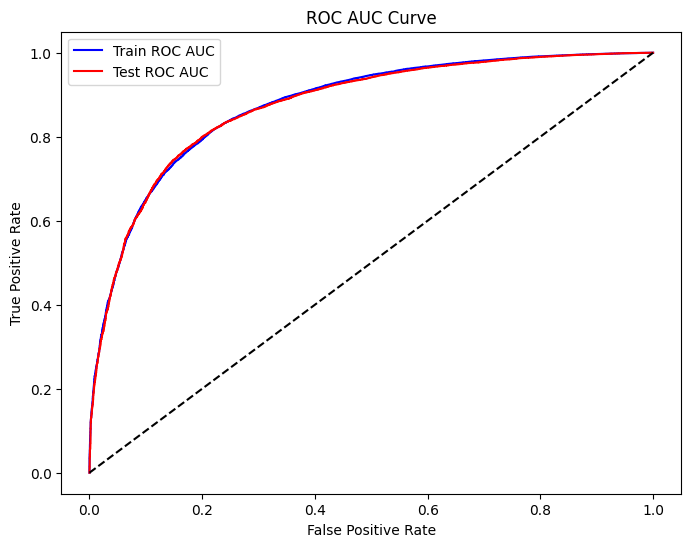

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve for training and testing data
train_fpr, train_tpr, _ = roc_curve(train_labels, train_preds)
test_fpr, test_tpr, _ = roc_curve(test_labels, test_preds)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC AUC', color='blue')
plt.plot(test_fpr, test_tpr, label='Test ROC AUC', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


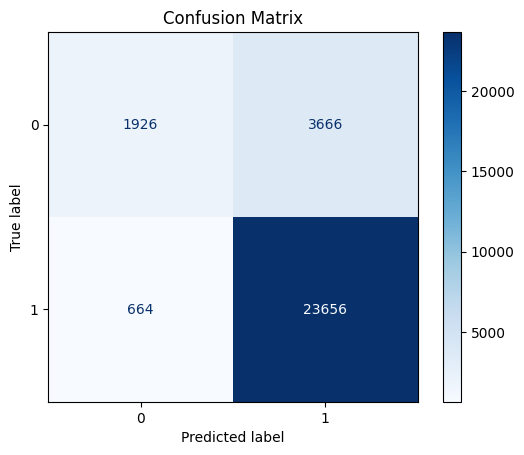

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = best_rf.predict(test)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")  # Use a color map for better visibility
plt.title("Confusion Matrix")
plt.show()


### Helper function to Evaluate model

In [33]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)

    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()


### Evaluate the best model
- Plot the ROC AUC Curve

Recall Baseline: 1.0 Test: 0.97 Train: 0.98
Precision Baseline: 0.81 Test: 0.87 Train: 0.87
Roc Baseline: 0.5 Test: 0.87 Train: 0.88


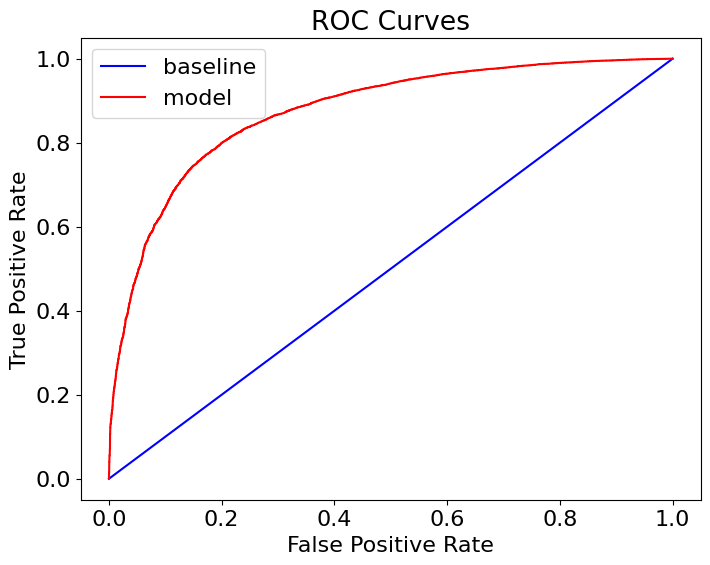

In [34]:
# Get predictions and probabilities for the test set
test_predictions = best_rf.predict(test)
test_probs = best_rf.predict_proba(test)[:, 1]  # Probabilities for the positive class

# Get predictions and probabilities for the training set
train_predictions = best_rf.predict(train)
train_probs = best_rf.predict_proba(train)[:, 1]  # Probabilities for the positive class

# Evaluate the model
evaluate_model(test_predictions, test_probs, train_predictions, train_probs)


### Confusion Matrix Helper function

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)


Confusion matrix, without normalization
[[ 1926  3666]
 [  664 23656]]


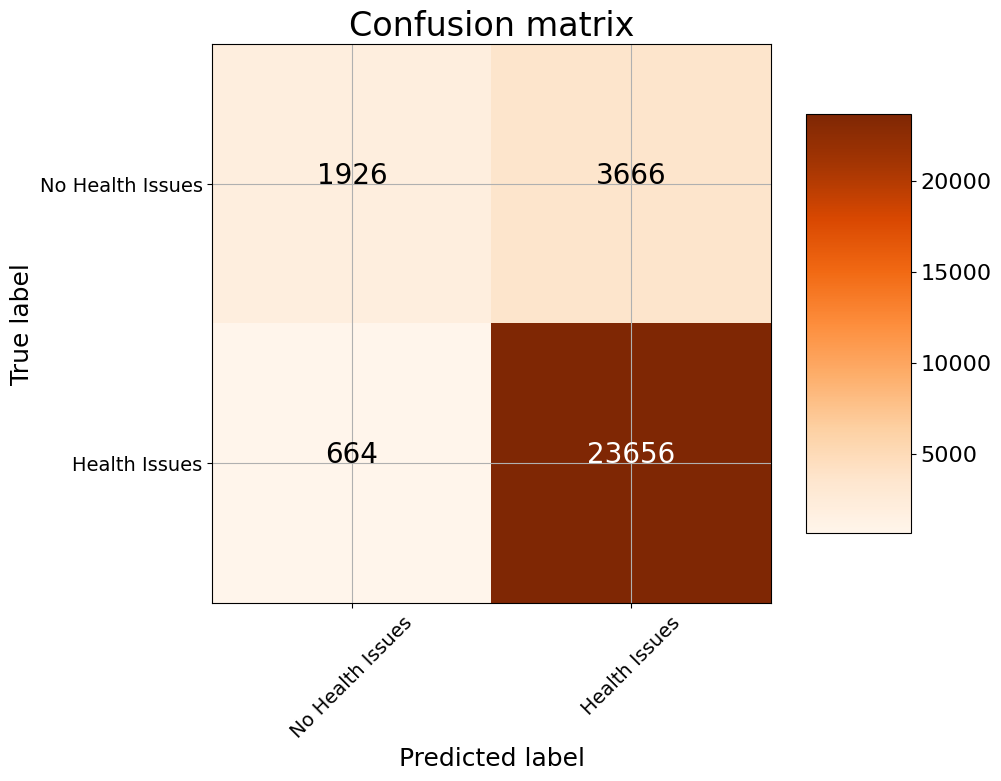

In [36]:
# Get confusion matrix for the test set
cm = confusion_matrix(test_labels, test_predictions)

# Call the helper function to plot the confusion matrix
plot_confusion_matrix(cm, classes=['No Health Issues', 'Health Issues'], normalize=False)


# Please do not run the below 2 cells....
## It is given only for your comparision of Decision Tree, RandomForest and your very own Best RandomForest

In [ ]:
# Decision Tree Confusion Matrix

In [ ]:
# Random Forest

### Evaluate the best model
- Plot Confusion Matrix

In [ ]:
# Get confusion matrix for the test set
cm = confusion_matrix(test_labels, test_predictions)

# Call the helper function to plot the confusion matrix
plot_confusion_matrix(cm, classes=['No Health Issues', 'Health Issues'], normalize=False)

# Also, print classification metrics for better understanding
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_predictions))


### Observations / Insights ???

True Positive (TP): Number of times the model correctly predicted a health issue (label = 1).
True Negative (TN): Number of times the model correctly predicted no health issue (label = 0).
False Positive (FP): Number of times the model incorrectly predicted a health issue when there was none.
False Negative (FN): Number of times the model failed to predict a health issue when there was one.
If the confusion matrix has many FNs or FPs, this could indicate where the model is making significant errors.

Precision, Recall, F1-Score:

Precision: Of all the positive predictions, how many were actually correct (TP / (TP + FP)).
Recall: Of all the actual positive samples, how many did the model correctly identify (TP / (TP + FN)).
F1-Score: Harmonic mean of precision and recall. A high F1 score indicates a good balance between precision and recall.
If the recall is low and the precision is high, the model is doing well at predicting when there is a health issue, but it might miss some cases. If the precision is low and recall is high, the model is predicting too many false positives.

ROC Curve and AUC:

A higher AUC (Area Under the Curve) value indicates that the model has a good ability to distinguish between positive and negative classes. A value close to 1 is ideal.
A value close to 0.5 suggests the model is not much better than random guessing.
Training vs. Test Performance:

If you notice a large gap between the performance on the training set and the test set (overfitting or underfitting), you may need to adjust your hyperparameters further or collect more data.
If the performance is similar, it indicates that the model is generalizing well.

### Bonus: What if you want to explain your best RandomForest to your boss on the way it split the features??? Do not fret. Capture the estimator and convert them into a .png and present it in the meeting and get accolodes.

In [43]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os
import graphviz  # Required for visualization


In [45]:
# Ensure best_model is properly defined
best_model = grid_search.best_estimator_  # Get the best model from GridSearchCV

# Select a single decision tree from the Random Forest model
estimator = best_model.estimators_[1]  # Pick the second tree

# Define file paths
dot_file = "/content/tree_from_optimized_forest.dot"
png_file = "/content/tree_from_optimized_forest.png"

# Export tree to DOT format
export_graphviz(
    estimator,
    out_file=dot_file,  # Fixed: added `out_file` argument
    rounded=True,
    feature_names=X_train.columns,
    max_depth=8,
    class_names=['poverty', 'no poverty'],
    filled=True
)

# Convert DOT file to PNG using Graphviz
call(['dot', '-Tpng', dot_file, '-o', png_file, '-Gdpi=200'])

# Display the image in Google Colab
if os.path.exists(png_file):
    display(Image(png_file))
else:
    print("Error: PNG file not created. Ensure Graphviz is installed.")


NameError: name 'grid_search' is not defined

In [39]:
os.system("dot -version")


0

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here

import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')  # Ensure the file is renamed correctly

!kaggle datasets download -d cdc/behavioral-risk-factor-surveillance-system

!unzip behavioral-risk-factor-surveillance-system.zip -d /content/dataset/

import pandas as pd

# Load your dataset (adjust path if needed)
df = pd.read_csv('/content/dataset/2015.csv')  # Modify path based on the actual file name


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define features (X) and target (y) for your dataset
X = df.drop(columns=["target_column"])  # Replace "target_column" with your actual target column name
y = df["target_column"]  # Replace with your actual target column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomForest and perform GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os

# Select the best decision tree from the Random Forest model
estimator = best_model.estimators_[1]  # Choose any tree, here it's the second one

# Define file paths for DOT and PNG files
dot_file = "/content/tree_from_optimized_forest.dot"
png_file = "/content/tree_from_optimized_forest.png"

# Export the tree to a DOT file
export_graphviz(
    estimator,
    out_file=dot_file,
    rounded=True,
    feature_names=X_train.columns,
    max_depth=8,
    class_names=['poverty', 'no poverty'],  # Replace with your actual class names
    filled=True
)

# Convert DOT file to PNG using Graphviz
call(['dot', '-Tpng', dot_file, '-o', png_file, '-Gdpi=200'])

# Display the image in Google Colab
if os.path.exists(png_file):
    display(Image(png_file))
else:
    print("Error: PNG file not created. Ensure Graphviz is installed.")
